In [19]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import seaborn as sns

In [242]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Предварительный анализ данных   
Проверка данных на пропуски   
Отбор колонок с числами

In [165]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['age' 'fnlwgt' 'educational-num' 'capital-gain' 'capital-loss'
 'hours-per-week']


Выведем процентный список пропущенных данных

In [166]:
for col in df_numeric.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

age - 0%
fnlwgt - 0%
educational-num - 0%
capital-gain - 0%
capital-loss - 0%
hours-per-week - 0%


Отбор колонок без чисел 

In [167]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'gender' 'native-country' 'income']


Поиск пропущенных данных в категориальных значениях 

In [168]:
df_non_numeric.isin(['?']).sum()

workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
native-country     857
income               0
dtype: int64

Удаляем строки с отсутствующими данными в категориальных колонках

In [121]:
df.drop(df.index[df['workclass'] == '?'],inplace=True)
df.drop(df.index[df['occupation'] == '?'],inplace=True)
df.drop(df.index[df['native-country'] == '?'],inplace=True)
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Построим график зависимости дохода от класса работы

Text(0.5, 1.0, 'Зависимость дохода от класса работы')

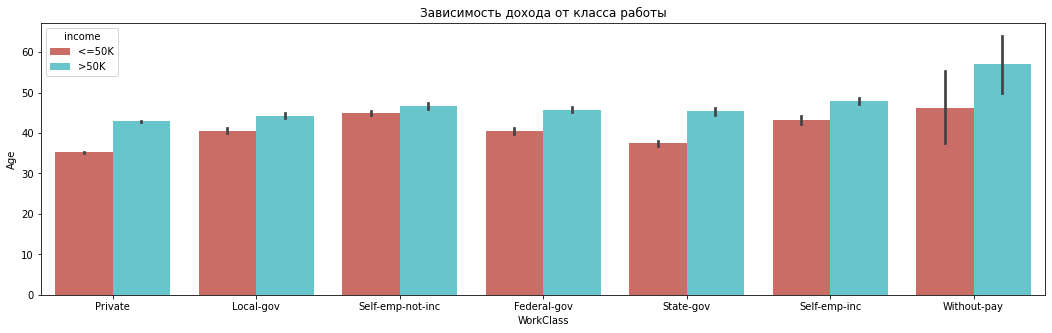

In [161]:
plt.figure(figsize= (18,5))
ax = sns.barplot(x='workclass',y='age', hue='income', data=df, palette = 'hls')
ax.set_xlabel('WorkClass')
ax.set_ylabel('Age')
ax.set_title('Зависимость дохода от класса работы')

Построим гистограмму накопления капитала в зависимости от возраста 

Text(0.5, 1.0, 'Количество людей с доходом более 50К по уровню образования')

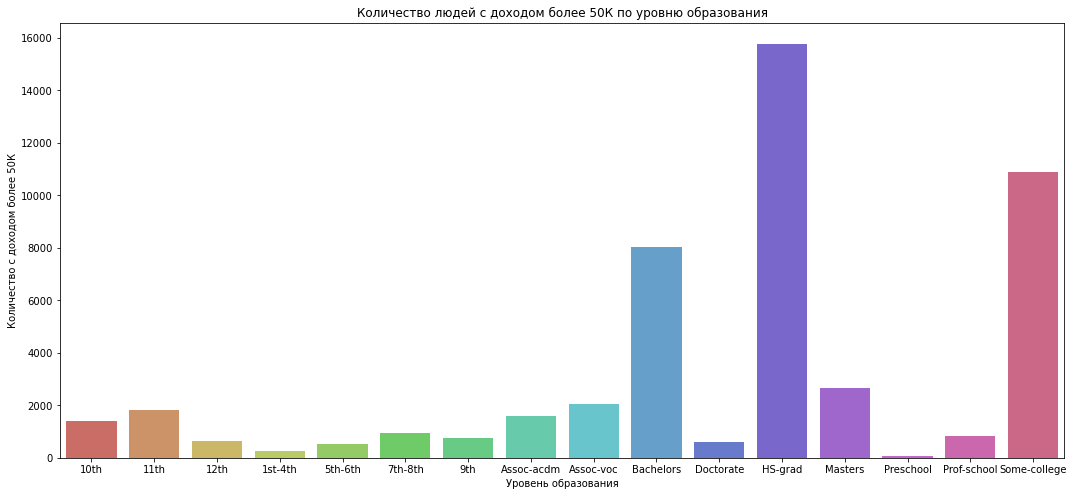

In [246]:
education_data = df.groupby('education')['income'].count()
education_data = education_data.reset_index()
plt.figure(figsize = (18,8))
ax2 = sns.barplot(x = 'education', y ='income', data = education_data, palette = 'hls')
ax2.set_xlabel('Уровень образования')
ax2.set_ylabel('Количество с доходом более 50К')
ax2.set_title('Количество людей с доходом более 50К по уровню образования')

Преобразуем категориальные данные

In [195]:
df = pd.get_dummies(df, columns=['workclass', 'marital-status' ,'occupation', 'relationship', 'race' , 'native-country'])
df['gender'] = df['gender'].map({'Male':1, "Female":0})
df['income'] = df['income'].map({'<=50K':0, ">50K":1})

In [199]:
df.columns

Index(['age', 'fnlwgt', 'education', 'educational-num', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'income',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv'

Удаляем неважные признаки 

In [201]:
df = df.drop(['fnlwgt', 'education', 'native-country_?', 'workclass_?', 'occupation_?'], axis = 1)

In [204]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
age,25,38,28,44,18,34,29,63,24,55,65,36,26,58,48,43,20,43,37,40
educational-num,7,9,12,10,10,6,9,15,10,4,9,13,9,9,9,14,10,9,9,16
gender,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,0,0,1
capital-gain,0,0,0,7688,0,0,0,3103,0,0,6418,0,0,0,3103,0,0,0,0,0
capital-loss,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
native-country_Trinadad&Tobago,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
native-country_United-States,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
native-country_Vietnam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Записываем в целевую переменную y преобразованный столбец income

In [206]:
y = df['income'] 

Масштабируем данные и записываем их в переменную Х

In [208]:
X = StandardScaler().fit_transform(df.drop(['income'], axis = 1)) 

In [236]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

Обучение модели методом логистической регрессии

In [213]:
model = LogisticRegression()

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [224]:
predictions

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [225]:
model.predict_proba(X_test)

array([[0.98591905, 0.01408095],
       [0.89463573, 0.10536427],
       [0.06464567, 0.93535433],
       ...,
       [0.41821401, 0.58178599],
       [0.99688003, 0.00311997],
       [0.2648291 , 0.7351709 ]])

In [226]:
model.score(X_test, y_test)

0.8555635172484389

Обучение модели методом опорных векторов

In [235]:
from sklearn.svm import SVC

In [238]:
model_SVC = make_pipeline(StandardScaler(), SVC(gamma='auto')) 

In [239]:
model_SVC.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [240]:
model_SVC.score(X_test, y_test)

0.8562800696079435

### Вывод:   
В данной работе был использован датасет, который содержит информацию о людях и их доходах.   
Целевой признак income категориальный и имеет 2 категории (">50K" и "<=50К"), это задача классификации.   
С помощью моделей Логистической регрессии и Опорных векторов мы можем спрогнозировать заработок людей.    
Для этого мы провели предобработку данных. Нашли и удалили пропуски, выявили столбцы с категориальными признаками, перобразовали их в числовые. Масшта,ировали данные с помощью StandartScaller.   
В целом модели хорошо справились с задачей . Мы получили точность предсказаний 85,5%. Дkя улучшения качества прогноза можно пробовать другие модели и использоать оптимизацию по признакам. 